In [3]:
# read and plot surface NO2 in the sichuan basin region
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
%matplotlib inline


In [60]:
path = "/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/"
fileList = glob.glob(path+"OMI_*.nc")
fileList_sort = sorted(fileList)

In [61]:
fileList_sort

['/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/OMI_downscaled-inferred_surface_no2_asia_2005.nc',
 '/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/OMI_downscaled-inferred_surface_no2_asia_2006.nc',
 '/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/OMI_downscaled-inferred_surface_no2_asia_2007.nc',
 '/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/OMI_downscaled-inferred_surface_no2_asia_2008.nc']

In [62]:
## read a sample data to get the resolutions for lat,lon
ds = xr.open_dataset(fileList_sort[0])
lats = ds["LAT_CENTER"][0,:].data
lons = ds["LON_CENTER"][:,0].data
res_lat = lats[1] - lats[0]
res_lon = lons[1] - lons[0]

In [63]:
# Create the bins based on a 0.036 x 0.036 grid
lat_bins = np.arange(lats[0]-(res_lat/2.),lats[-1]+(res_lat/2),res_lat)
lon_bins = np.arange(lons[0]-(res_lon/2.),lons[-1]+(res_lon/2), res_lon)

# define a label for each bin corresponding to the central latitude
lat_center = lats
lon_center = lons

In [64]:
for i in range(0,len(fileList_sort)):
        print(i)
        # Open the file with 
        tmp = xr.open_dataset(fileList_sort[i])["surface_no2_ppb"]
        tmp_name = fileList_sort[i].split('_')[-1].split('.')[0]
        print(tmp_name)
        tmp= tmp.rename({'lon_dim': 'lon', 'lat_dim':'lat'})
        
        # Flag out negative values
        tmp_flag = tmp.where(tmp>0,np.nan)
        
        # Create a xarray.DataArray with the regridded array and the define latituden and longitude bins
        data_array = xr.DataArray(
                tmp.values,
                dims=['lat','lon'],
                coords={
                    'lat':(['lat'],lat_bins),
                    'lon':(['lon'],lon_bins)
                },
                attrs={'units': "ppb"},
                name='surface_no2_ppb'
            )
        
        # Save the created xarray.DatArray as netCDF file
        data_array.to_netcdf(path+'surface_no2_ppb.asia.'+tmp_name+'.nc', 'w')

0
2005


ValueError: different number of dimensions on data and dims: 2 vs 3

In [42]:
# China region
lonL = 73
lonR = 135
latS = 15
latN = 60

<GeoAxesSubplot: xlabel='lon', ylabel='lat'>

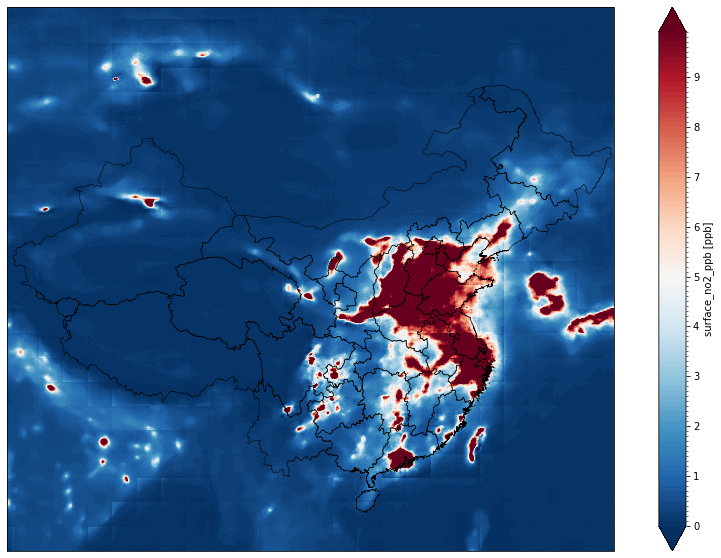

In [44]:
fig,axes = plt.subplots(1,2,figsize=[16,10],subplot_kw={'projection': ccrs.PlateCarree()})
axes = np.ravel(axes)
import geopandas as gpd
from descartes import PolygonPatch
# Load the shapefiles
gdf = gpd.read_file('/nfs/see-fs-01_users/earxzho/TROPOMI/data/shapefile/China/gadm41_CHN_1.shp')

ax1= axes[0]
ds1["surface_no2_ppb"].sel(lat=slice(latS,latN),lon=slice(lonL,lonR)).plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(),
                                          x='lon', y='lat', levels=np.arange(0,10,0.1))

# Add the city boundaries to the plot using geopandas
# plot the city boundaries on top of the contour plot
gdf.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1.5)

ax=
# ax.set_xlim([lonL,lonR])
# ax.set_ylim([latS,latN])

In [85]:
# Sichuan basin region
lonL = 95
lonR = 111
latS = 25
latN = 34.5

<GeoAxesSubplot: xlabel='lon', ylabel='lat'>

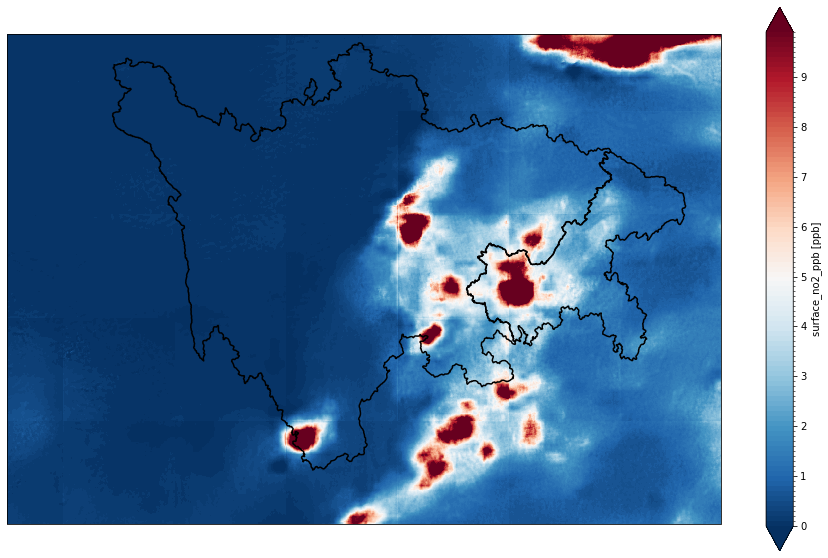

In [86]:
fig,ax = plt.subplots(1,1,figsize=[16,10],subplot_kw={'projection': ccrs.PlateCarree()})
gdf = gpd.read_file('/nfs/see-fs-01_users/earxzho/TROPOMI/data/shapefile/China/gadm41_CHN_1.shp')
# Filter the dataframe to select only the cities you want to plot
cities = ['Chongqing', 'Sichuan']
gdf = gdf[gdf['NAME_1'].isin(cities)]
ds1["surface_no2_ppb"].sel(lat=slice(latS,latN),lon=slice(lonL,lonR)).plot.pcolormesh(ax=ax,
                                          x='lon', y='lat', levels=np.arange(0,10,0.1))

# Add the city boundaries to the plot using geopandas
# plot the city boundaries on top of the contour plot
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)


In [106]:
fileList = glob.glob(path+"surface_no2_ppb*.nc")
fileList_sort = sorted(fileList)
fileList

['/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/surface_no2_ppb.asia.2005.nc',
 '/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/surface_no2_ppb.asia.2006.nc',
 '/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/surface_no2_ppb.asia.2007.nc',
 '/nfs/see-fs-01_users/earxzho/TROPOMI/data/surfaceNO2/surface_no2_ppb.asia.2008.nc']

In [107]:
data = []
for i in range(0,len(fileList_sort)):
        print(i)
        # Open the file with 
        tmp = xr.open_dataset(fileList_sort[i])["surface_no2_ppb"]
        year =  fileList_sort[i].split('.')[-2]
        print(year)
        data.append(tmp)
    

0
2005
1
2006
2
2007
3
2008


In [78]:
ds = xr.concat( data,  pd.Index([2005, 2006,2007,2008], name="year"))

In [89]:
coeffs = ds.sel(lat=slice(latS,latN),lon=slice(lonL,lonR)).polyfit('year',deg=1)

Text(0.5, 1.0, 'NO2 surface trend 2005-2008')

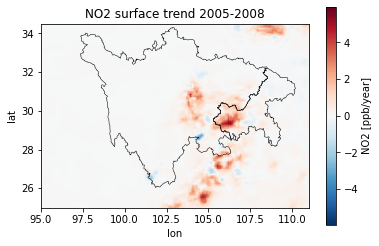

In [105]:
coeffs['polyfit_coefficients'][0,:,:].plot.pcolormesh(
                                          x='lon', y='lat',
                                          cbar_kwargs={'label': 'NO2 [ppb/year]'})
# plot the city boundaries on top of the contour plot
gdf.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=0.5)
plt.title("NO2 surface trend 2005-2008")


In [114]:
## get the nearest grid for a city, Chengdu for example.
lat_Chengdu = 30.57
lon_Chengdu = 104.07

sub = ds.sel(lat=lat_Chengdu,lon=lon_Chengdu, method='nearest')


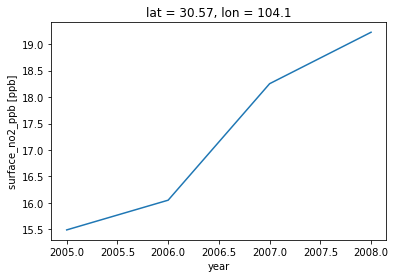

In [115]:
sub.plot()